In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv("/home/maria-fernanda/Desktop/workshop2/Data/spotify_dataset.csv")

In [46]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [47]:
print(f"cantidad de columnas : {df.shape[1]}")  

cantidad de columnas : 21


In [48]:
print(f"cantidad de filas : {df.shape[0]}")  

cantidad de filas : 114000


Tipo de dato de las variables del conjunto

In [49]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Cantidad de variables en cada tipo de dato

In [50]:
(
    df
    .dtypes
    .value_counts()
)


float64    9
int64      6
object     5
bool       1
Name: count, dtype: int64

Cantidad de variables y observaciones

In [51]:
df.shape

(114000, 21)

Existencia de valores nulos

In [52]:
(   df
    .isnull()
    .any()
)

Unnamed: 0          False
track_id            False
artists              True
album_name           True
track_name           True
popularity          False
duration_ms         False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
dtype: bool

DE tener observaciones con valores nulos, ¿cuantas hay por cada variable?

In [53]:
(
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

artists             1
album_name          1
track_name          1
Unnamed: 0          0
mode                0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
key                 0
loudness            0
track_id            0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64

Total de valores nulos en el conjunto dedatos

In [54]:
(
    df
    .isnull()
    .sum()
    .sum()
)

np.int64(3)

Distribución de la Popularidad: Para entender cómo se distribuye la popularidad de las canciones.

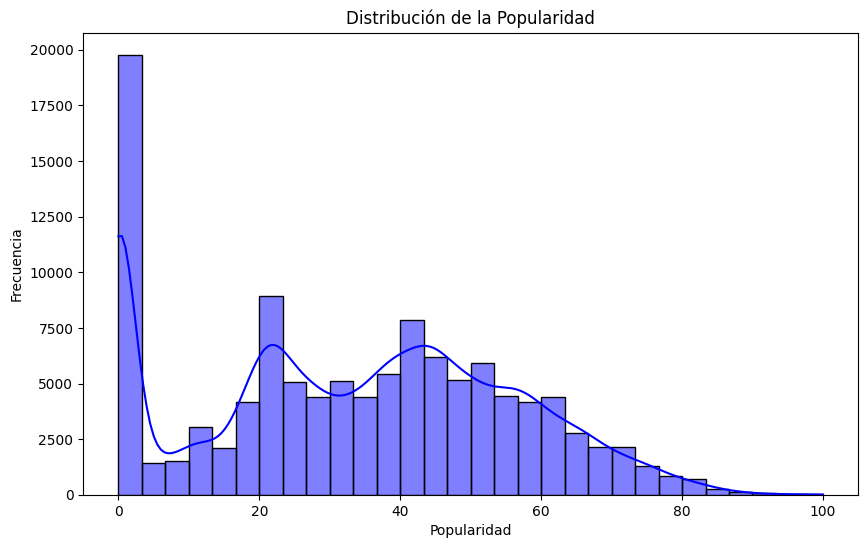

In [55]:
# 1. Distribución de la Popularidad
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

Este gráfico muestra la distribución de la popularidad de las canciones en el dataset. La mayoría de las canciones tienen una popularidad baja (en torno a 0-20), con un pico significativo en el rango de 0-10, lo que indica que una gran cantidad de canciones son poco populares. Sin embargo, se observa una distribución más dispersa hacia valores más altos, mostrando que algunas canciones alcanzan popularidades moderadas y altas (hasta 100), aunque en menor cantidad.

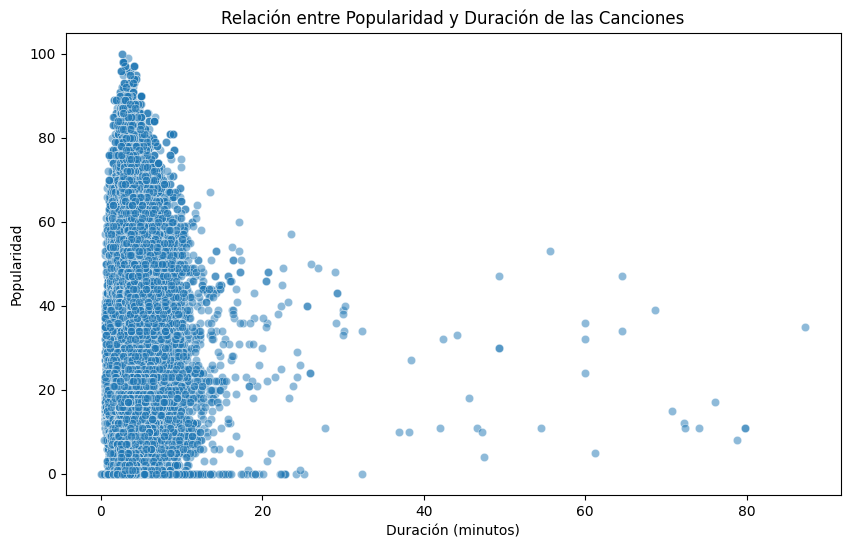

In [56]:
# 2. Relación entre Popularidad y Duración
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['duration_ms'] / 60000, y=df['popularity'], alpha=0.5)
plt.title('Relación entre Popularidad y Duración de las Canciones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.show()

Este gráfico de dispersión muestra la relación entre la popularidad y la duración de las canciones. La mayoría de las canciones tienen una duración entre 2 y 5 minutos, independientemente de su popularidad. No parece haber una correlación clara entre la duración y la popularidad, ya que canciones con diferentes duraciones tienen popularidades que varían de 0 a 100. Sin embargo, las canciones con una duración extremadamente larga (más de 10 minutos) tienden a tener popularidad más baja.

Distribución de géneros musicales.

/tmp/ipykernel_36645/883055884.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


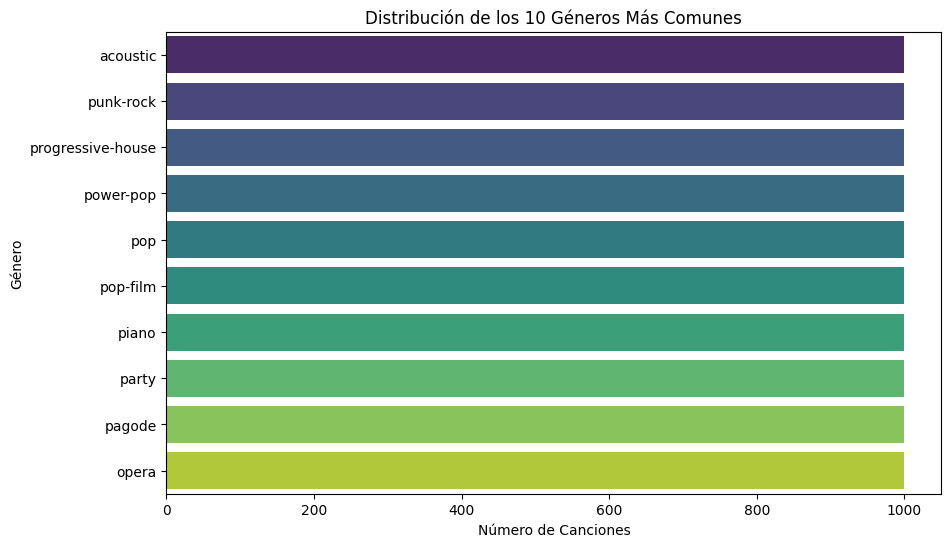

In [57]:
# 3. Distribución de Géneros Musicales
plt.figure(figsize=(10, 6)) 
top_genres = df['track_genre'].value_counts().head(10)  # Los 10 géneros más comunes
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Distribución de los 10 Géneros Más Comunes')
plt.xlabel('Número de Canciones')
plt.ylabel('Género')
plt.show()

Este gráfico de barras muestra la distribución de los 10 géneros musicales más comunes en el dataset de Spotify. Se puede observar que los géneros "acoustic" y "punk-rock" son los más representados, con más de 1000 canciones cada uno. A medida que bajamos en la lista, géneros como "opera" y "pagode" están presentes, pero con una menor cantidad de canciones.

Top 10 Artistas

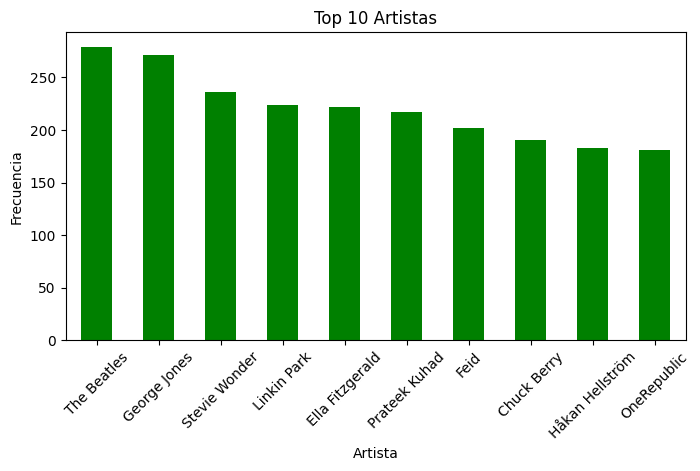

In [58]:
# 1. Filtrar los 10 artistas con más nominaciones
top_10_artists = df['artists'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras 
plt.figure(figsize=(8, 4)) 
top_10_artists.plot(kind='bar', color='green')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.title('Top 10 Artistas')
plt.xticks(rotation=45)
plt.show()

El gráfico de barras muestra a los 10 artistas más frecuentes en el dataset de Spotify, destacando a **The Beatles** y **George Jones** como los más representados, con alrededor de 250 canciones cada uno. Les siguen **Stevie Wonder**, **Linkin Park** y **Ella Fitzgerald**, con más de 200 canciones. Otros artistas como **Prateek Kuhad**, **Feid**, y **Chuck Berry** también tienen una presencia notable en el dataset, aunque en menor cantidad.

Top 10 Albumes

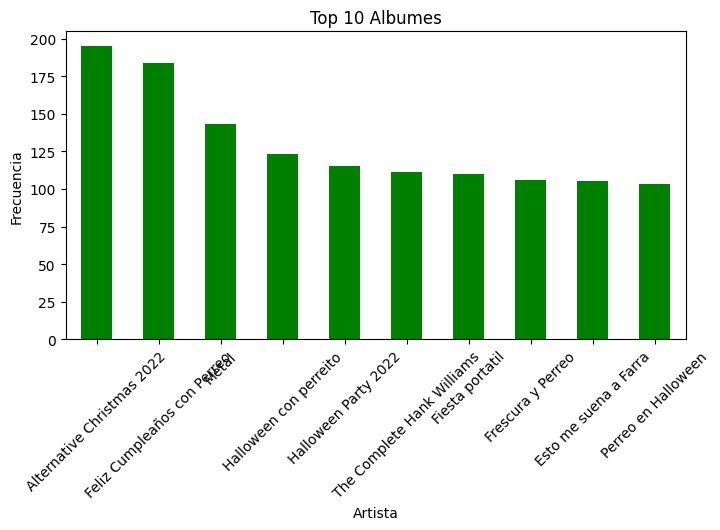

In [59]:
# 1. Filtrar los 10 artistas con más nominaciones
top_10_artists = df['album_name'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras 
plt.figure(figsize=(8, 4)) 
top_10_artists.plot(kind='bar', color='green')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.title('Top 10 Albumes')
plt.xticks(rotation=45)
plt.show()

El gráfico de barras muestra los 10 álbumes más frecuentes en el dataset de Spotify. El álbum con mayor representación es "Alternative Christmas 2022", con alrededor de 200 canciones. Le sigue "Feliz Cumpleaños con Perreo" con aproximadamente 150 canciones. Otros álbumes destacados incluyen "Halloween con perrito", "Halloween Party 2022", y "The Complete Hank Williams", todos con un número considerable de canciones. 

Matriz de correlación.

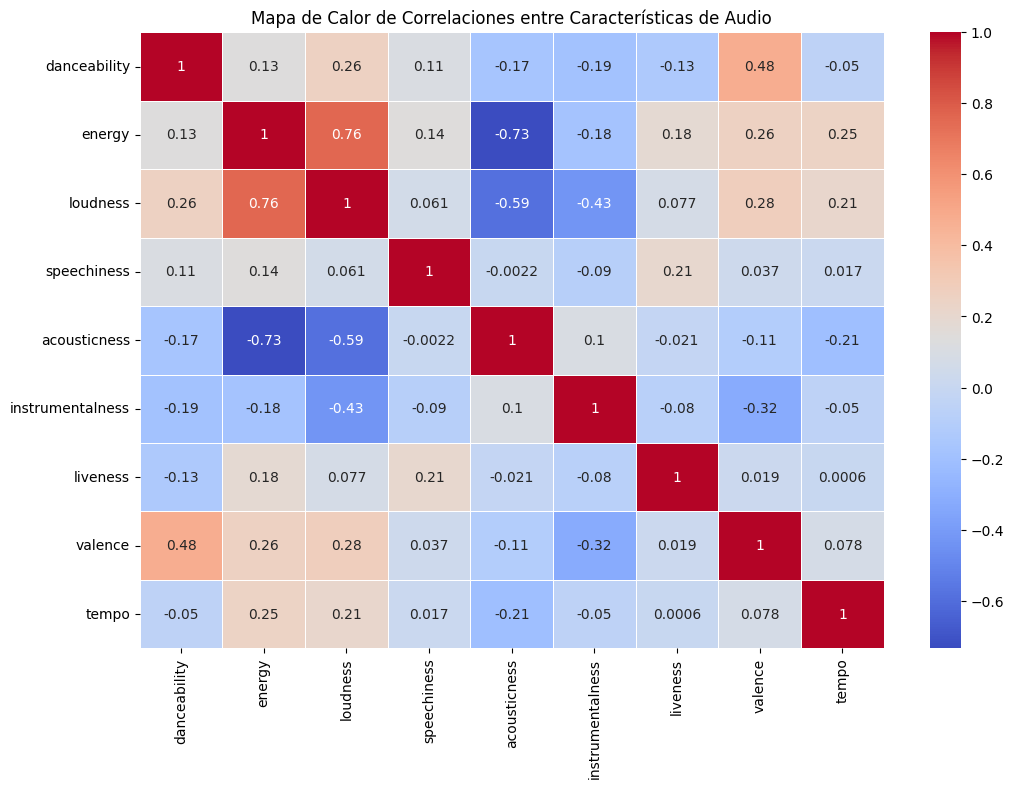

In [60]:
# 4. Mapa de Calor de Correlaciones entre Características
plt.figure(figsize=(12, 8))
corr_matrix = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                            'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Características de Audio')
plt.show()

Este mapa de calor muestra las correlaciones entre las diferentes características de audio de las canciones en el dataset de Spotify.
Estas son algunas relaciones importantes:

* Existe una fuerte correlación positiva entre energy y loudness (0.76), lo que indica que las canciones más energéticas tienden a ser más ruidosas.
* Danceability y valence tienen una correlación moderada (0.48), lo que sugiere que canciones más bailables suelen tener un tono más positivo o alegre.
* Acousticness tiene una correlación negativa fuerte con energy (-0.73) y loudness (-0.59), lo que implica que las canciones más acústicas tienden a ser menos energéticas y más suaves.

Gráfico de la distribución de características de las canciones.

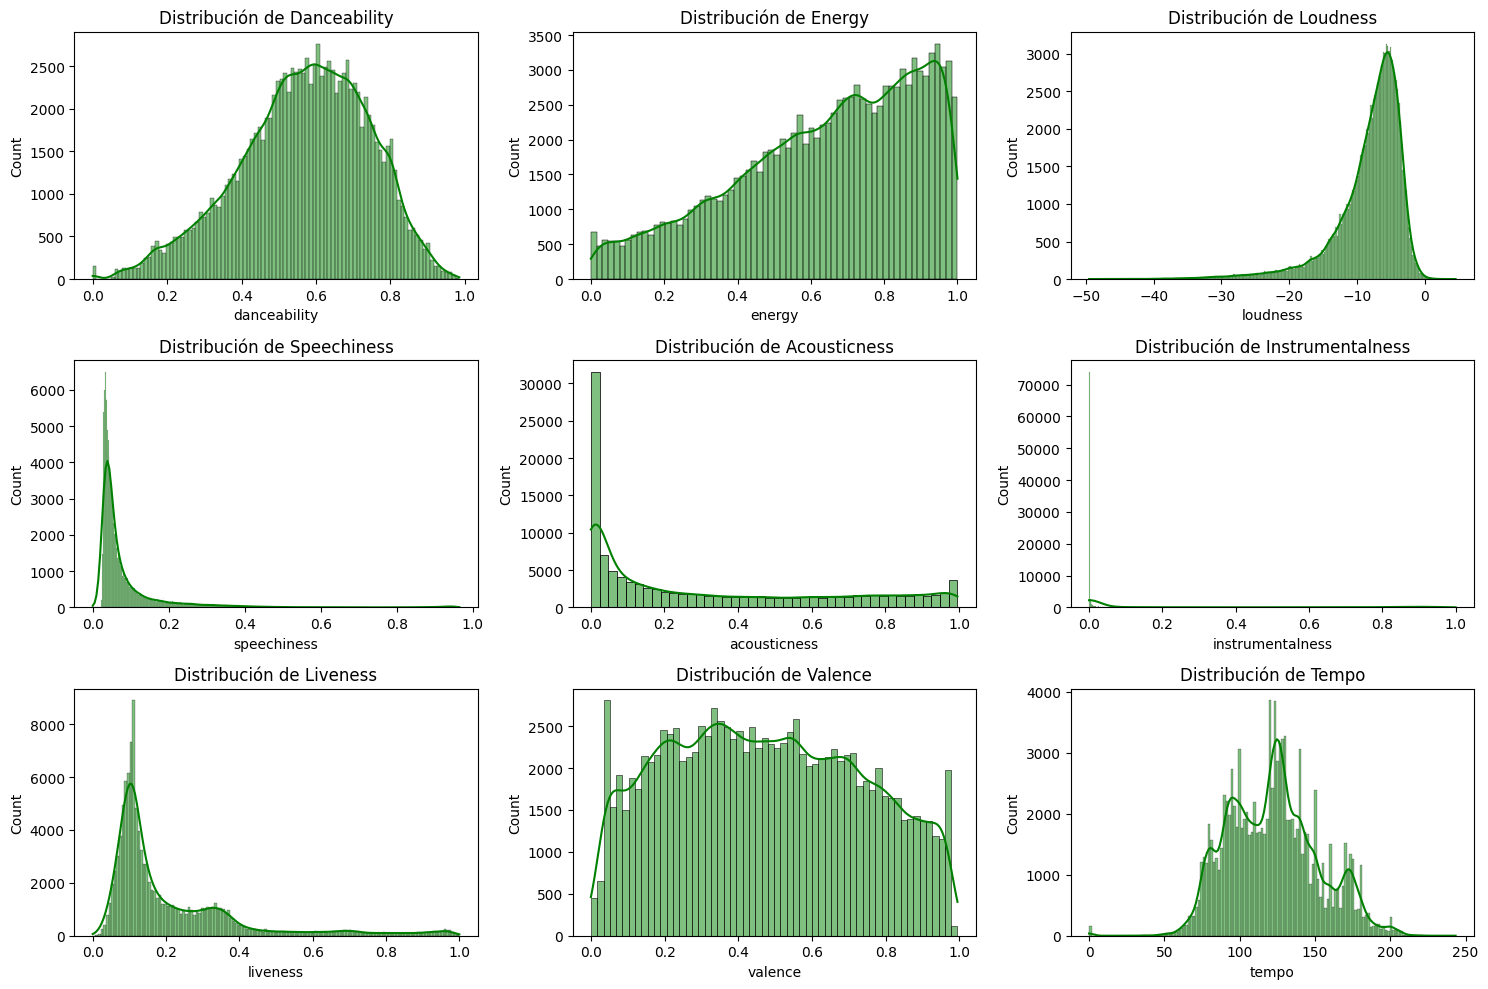

In [61]:
# 5. Distribución de Características de las Canciones
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, color='green')
    plt.title(f'Distribución de {feature.capitalize()}')

plt.tight_layout()
plt.show()

Este conjunto de gráficos muestra las distribuciones de varias características de audio en el dataset de Spotify. 
Aquí están algunas interpretaciones clave:

1. **Danceability**: La mayoría de las canciones tienen un valor de danceability entre 0.5 y 0.8, lo que sugiere que muchas canciones son bastante bailables.
   
2. **Energy**: La energía de las canciones está bastante distribuida, con un ligero sesgo hacia valores altos, lo que implica que las canciones tienden a ser energéticas.

3. **Loudness**: La mayoría de las canciones tienen un valor de loudness entre -10 y 0 dB, lo que indica que generalmente son bastante fuertes.

4. **Speechiness**: La mayoría de las canciones tienen valores muy bajos de speechiness, lo que significa que la mayoría son principalmente musicales en lugar de habladas.

5. **Acousticness**: Una gran parte de las canciones tiene un valor bajo de acousticness, lo que sugiere que muchas canciones no son acústicas.

6. **Instrumentalness**: La mayoría de las canciones tienen un valor cercano a 0, indicando que la mayoría de las canciones tienen letras y no son instrumentales.

7. **Liveness**: La mayoría de las canciones tienen valores bajos de liveness, lo que sugiere que la mayoría no fueron grabadas en vivo.

8. **Valence**: La valence está distribuida de manera bastante uniforme, lo que sugiere una mezcla de canciones con emociones positivas y negativas.

9. **Tempo**: El tempo muestra una distribución bimodal, con picos en torno a los 100 y 120 BPM, lo que es típico para canciones de ritmo moderado a rápido.

Conteos y proporciones

In [62]:
df.describe(include='all')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,114000.000000,114000,113999,113999,113999,114000.000000,1.140000e+05,114000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000
unique,NaN,89741,31437,46589,73608,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,104253,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.500000,NaN,NaN,NaN,NaN,33.238535,2.280292e+05,NaN,0.566800,0.641383,...,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,NaN
std,32909.109681,NaN,NaN,NaN,NaN,22.305078,1.072977e+05,NaN,0.173542,0.251529,...,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.750000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,NaN,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,NaN
50%,56999.500000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,NaN,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.250000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,NaN,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


In [63]:
#Numéricas
df.describe(include=[np.number])

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [64]:
#Categóricas
df.describe(include=object)

,track_id,artists,album_name,track_name,track_genre
count,114000,113999,113999,113999,114000
unique,89741,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


In [65]:
#Booleanas
df.describe(include=bool)

,explicit
count,114000
unique,2
top,False
freq,104253


TRANSFORMACIONES

Vemos que la columna Unamed0 es una columna para identificar, lo que no es útil para nosotros porque tenemos nuestra propia columna de índice, por ende la eliminamos.

In [66]:
df.drop(columns=("Unnamed: 0"), inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

Vamos a eliminar el track_id, ya que para eso tenemos el track_name

In [70]:
df.drop(columns=("track_id"), inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11